In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
data=pd.read_csv("C:\Arun\Data/data_cleaned.csv")
data.shape

(891, 25)

In [3]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Segregating variables - Dependent & Independent 

In [5]:
x=data.drop(['Survived'], axis=1)
y=data['Survived']

#### Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y)

In [8]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [9]:
# Creating instance of KNN
clf=KNN(n_neighbors=3)

# Fitting the model
clf.fit(train_x, train_y)
# Predicting over the Train Set and calculating F1

train_predict=clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training F1 Score', k)

# Predicting over the Train Set and calculating F1
test_predict=clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score', k)

Training F1 Score 0.8209255533199196
Test F1 Score 0.7080745341614907


### Checking the Training F1 and Test F1curve

In [10]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_x)
        tmp = f1_score(tmp,train_y)
        train_f1.append(tmp)
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [11]:
#Defining K range
k = range(1,150)

In [12]:
# calling above defined function
train_f1, test_f1 = F1score(k)

In [13]:
score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)
score

,train score,test score
1,0.976654,0.701149
2,0.801865,0.595745
3,0.820926,0.708075
4,0.773034,0.628571
5,0.774327,0.666667
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

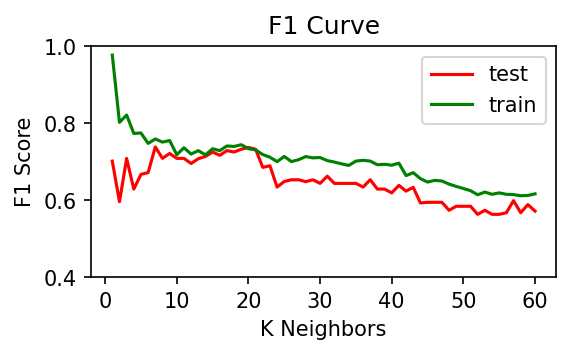

In [15]:
# plotting the Curvesg
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train_f1[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

In [16]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify = y)

In [17]:
# calling above defined function
k = range(1,50)
train, test = F1score(k)

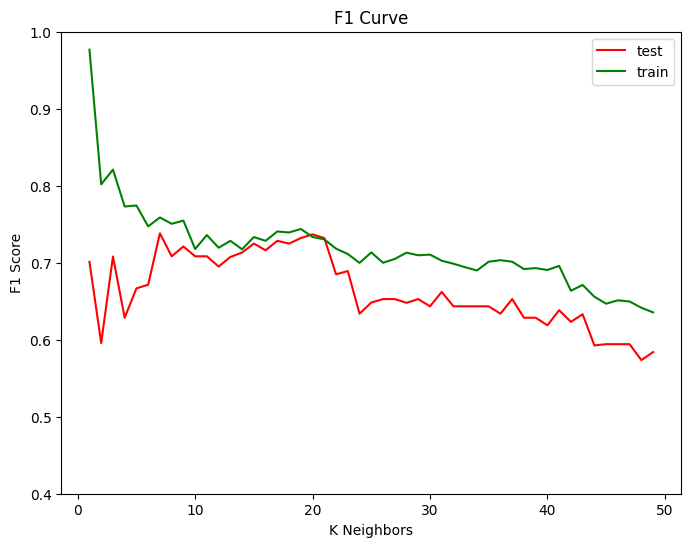

In [18]:
# plotting the Curves
plt.plot(k, test, color = 'red' , label = 'test')
plt.plot(k, train, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

# Hold_out Validation

In [19]:
# For train set
data_x = data.drop(['Survived'], axis=1)
data_y = data['Survived']

### Creating Validation and test set

In [20]:
from sklearn.model_selection import train_test_split as tts
train1_x, test_x , train1_y, test_y = tts( data_x, data_y , test_size = 0.2 , random_state = 50, stratify = data_y)

In [21]:
train_x, val_x, train_y, val_y = tts(train1_x, train1_y, test_size = 0.2 , random_state = 51, stratify = train1_y)

print('training data    ',train_x.shape,train_y.shape)
print('validation data  ',val_x.shape,val_y.shape)
print('test data        ',test_x.shape,test_y.shape)

training data     (569, 24) (569,)
validation data   (143, 24) (143,)
test data         (179, 24) (179,)


### Checking Distribution of target class in train, test and validation set

In [22]:
train_y.value_counts()/len(train_y)

Survived
0    0.616872
1    0.383128
Name: count, dtype: float64

In [23]:
val_y.value_counts()/len(val_y)

Survived
0    0.615385
1    0.384615
Name: count, dtype: float64

In [24]:
test_y.value_counts()/len(test_y)

Survived
0    0.614525
1    0.385475
Name: count, dtype: float64

# Cross Validation

### Segregating variables - Dependent & Independent

In [25]:
#separating independent and dependent variables

x = data.drop(['Survived'], axis=1)
y = data['Survived']

#### Scaling the data

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x, y, random_state = 96, stratify=y)

### Importing KNN

In [28]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN

### Checking Consistency , using Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNN(n_neighbors=3), X=train_x, y=train_y, cv=10)
score

array([0.76119403, 0.74626866, 0.76119403, 0.7761194 , 0.65671642,
       0.80597015, 0.8358209 , 0.80597015, 0.81818182, 0.74242424])

In [31]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(np.float64(77.09859791949344), np.float64(4.856044270804294))

### Automating the process of cross validation for different K-Neighbors

In [32]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [33]:
n_neighbors = range(1, 50)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

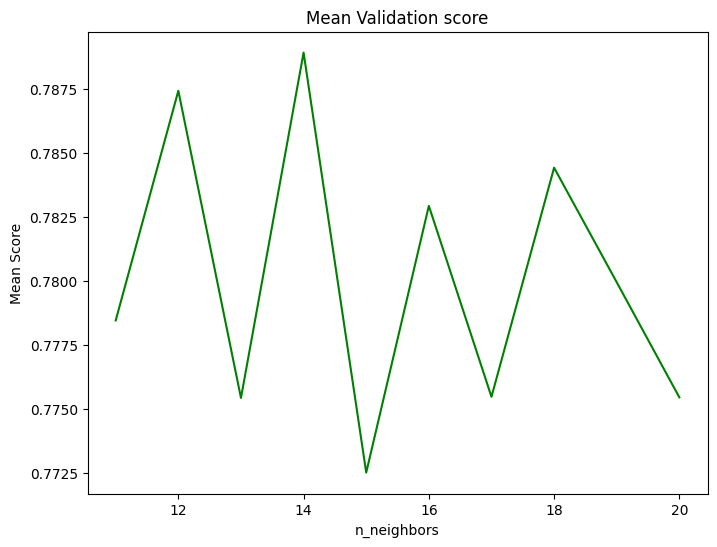

In [34]:
plt.plot(n_neighbors[10:20], mean[10:20], color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Trying the optimal model over test set

In [35]:
clf = KNN(n_neighbors = 14 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.8161434977578476, 0.811377245508982)